1. 任意选择4个UCI数据集，对基于信息增益划分选择(ID3)、基于基尼指数划分选择(CART)，基于对率回归划分选择的决策树算法(包括未剪枝、预剪枝、后剪枝三种)进行实验比较。
      说明：此题是必做题，要求至少实现基于信息增益、基于基尼指数（两种属性划分选择策略）的未剪枝决策树算法。

In [28]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import pydotplus


class decisionTree:
    def __init__(self, data, target, feature_names, target_names):
        self.data = data
        self.target = target
        self.feature_names = feature_names
        self.target_names = target_names
        # self.clf = self.predict(self)
        # self.print(self)

    def predict(self):
        x = self.data
        y = self.target
        X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=0.3, random_state=0)
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
        clf.fit(X_train, y_train)
        print("Accuracy:", clf.score(X_test, y_test))
        return clf

    def print(self,clf):
        dot_data = export_graphviz(clf, out_file=None,
                                   feature_names=self.feature_names,
                                   class_names=self.target_names,
                                   filled=True)
        graph = pydotplus.graph_from_dot_data(dot_data)
        return Image(graph.create_png())


iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()
diabetes = pd.read_csv('..\dataset\diabetes.csv', header=None)
diabetes.columns=['pregnant', 'plasma_glucose', 'blood_pressure', 'triceps', 'serum_insulin', 'body_mass_index', 'diabetes_pedigree', 'age', 'class']
# zoo = pd.read_csv('..\dataset\zoo.csv', header=None)
# flags.columns=
# zoo
diabetes


,pregnant,plasma_glucose,blood_pressure,triceps,serum_insulin,body_mass_index,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,-1
764,2,122,70,27,0,36.8,0.340,27,-1
765,5,121,72,23,112,26.2,0.245,30,-1
766,1,126,60,0,0,30.1,0.349,47,1


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] [ 1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1
  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1  1
  1 -1 

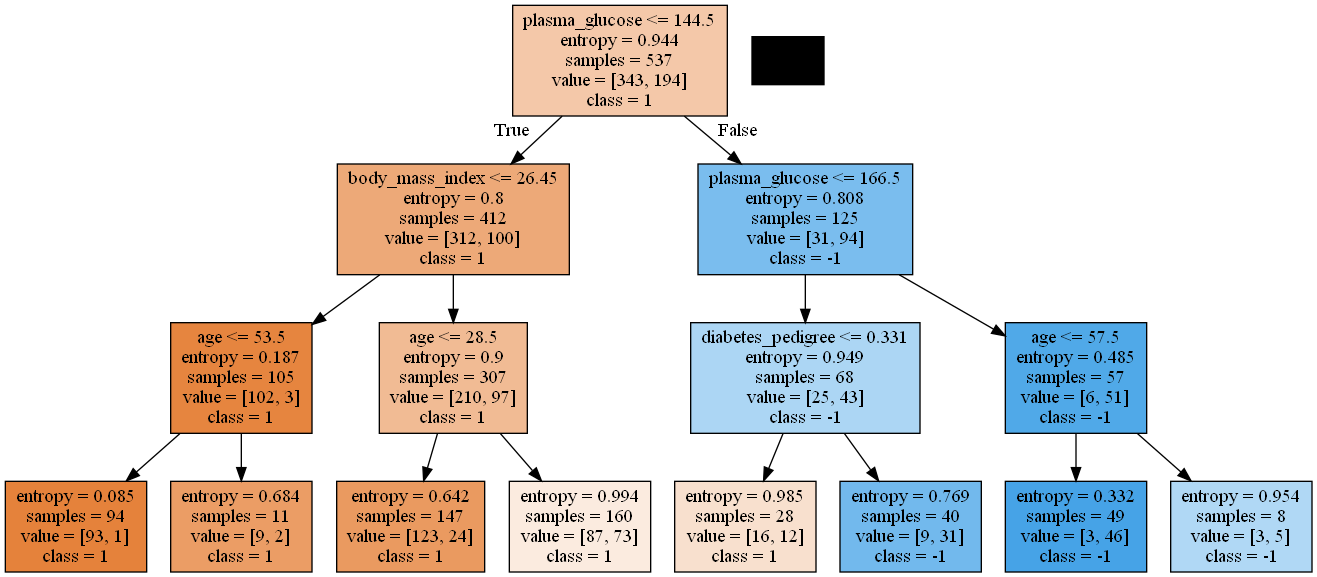

In [29]:
choose_data='diabetes'
if (choose_data == 'iris' or choose_data == 'wine' or choose_data == 'breast_cancer' or choose_data == 'diabetes'):
    if (choose_data=='iris'):
        data = iris.data
        target = iris.target
        feature_names = iris.feature_names
        target_names = iris.target_names
    elif (choose_data=='wine'):
        data = wine.data
        target = wine.target
        feature_names = wine.feature_names
        target_names = wine.target_names
    elif (choose_data=='breast_cancer'):
        data = breast_cancer.data
        target = breast_cancer.target
        feature_names = breast_cancer.feature_names
        target_names = breast_cancer.target_names
    elif (choose_data == 'diabetes'):
        data = diabetes.iloc[:, :-1].values
        target = diabetes.iloc[:, -1].values
        feature_names = list(diabetes.columns[:-1])
        target_names=['1','-1']
    else:
        print('Please choose data')
print(data,target,feature_names,target_names)
DT=decisionTree(data,target,feature_names,target_names)
clf=DT.predict()
DT.print(clf)

In [30]:
# from sklearn.model_selection import train_test_split
# data = zoo
# x = data.data   # x = iris.data[:, 0:2]
# y = data.target
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# data.target_names


In [31]:
# clf = DecisionTreeClassifier(criterion='gini')
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)


In [32]:
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# dot_data = export_graphviz(clf, out_file=None,
#                                 feature_names=data.feature_names,
#                                 class_names=data.target_names,
#                                 filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())
